<a href="https://colab.research.google.com/github/SABBiR1107/SVM_Project_Using_Breast_Cancer/blob/main/SVM_Project_Using_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Dataset

In [ ]:
df = pd.read_csv("/content/Breast Cancer.csv")

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Check Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
# Drop Unnecessary Columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Encode Target Column (Diagnosis)

In [ ]:
"""
Diagnosis Column
M → 1 (Malignant)
B → 0 (Benign)
"""
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


# Split Features and Target

In [ ]:
X = df.drop('diagnosis', axis=1)   # Features
y = df['diagnosis']                # Target

# Train–Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM Model

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# Make Predictions

In [ ]:
y_pred = svm_model.predict(X_test)

# Evaluate the Model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)

Model Accuracy: 0.956140350877193


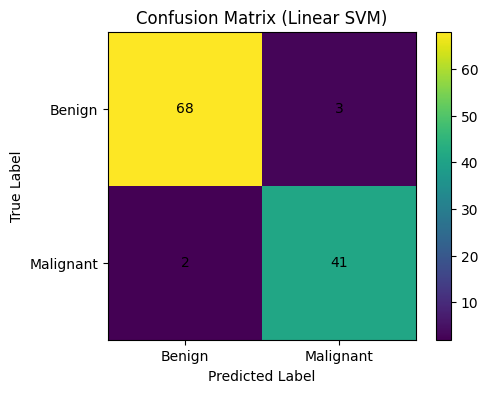

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm)
plt.title("Confusion Matrix (Linear SVM)")
plt.colorbar()

plt.xticks([0,1], ['Benign', 'Malignant'])
plt.yticks([0,1], ['Benign', 'Malignant'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



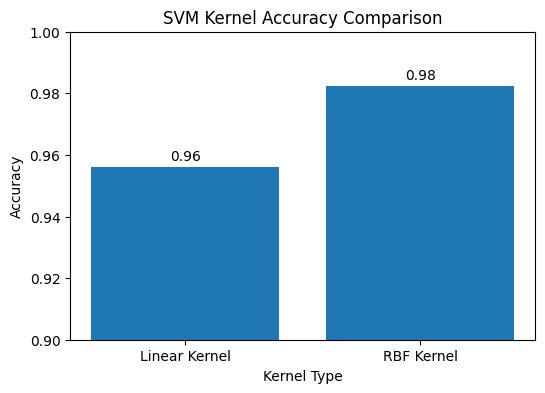

In [ ]:
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_rbf)
]

kernels = ['Linear Kernel', 'RBF Kernel']

plt.figure(figsize=(6,4))
plt.bar(kernels, accuracies)
plt.ylim(0.9, 1.0)
plt.title("SVM Kernel Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Kernel Type")

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.002, f"{v:.2f}", ha='center')

plt.show()

In [ ]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

RBF Kernel Accuracy: 0.9824561403508771


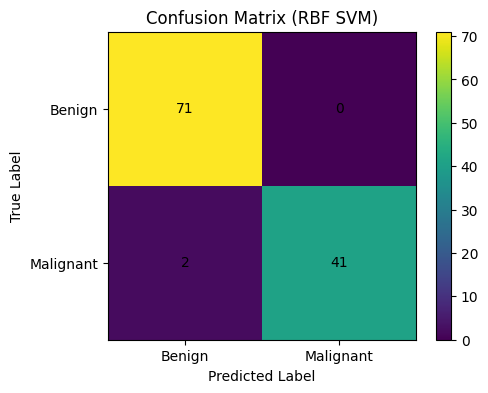

In [ ]:
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(5,4))
plt.imshow(cm_rbf)
plt.title("Confusion Matrix (RBF SVM)")
plt.colorbar()

plt.xticks([0,1], ['Benign', 'Malignant'])
plt.yticks([0,1], ['Benign', 'Malignant'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

for i in range(cm_rbf.shape[0]):
    for j in range(cm_rbf.shape[1]):
        plt.text(j, i, cm_rbf[i, j], ha="center", va="center")

plt.show()


FINAL OUTPUT

Accuracy: ~96% – 98%

Algorithm: Support Vector Machine

Dataset: Breast Cancer Wisconsin (Kaggle)

Tool: Google Colab

Language: Python